/Users/samsonkoelle/isometry-pursuit/isometry_pursuit/transformation.py:27: RuntimeWarning: overflow encountered in exp
  exp_values = ((np.exp(norms) + np.exp(norms ** (-1))) ** (-1)) * 2 * np.e
/Users/samsonkoelle/isometry-pursuit/isometry_pursuit/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12001/2634130006.py:23: RuntimeWarning: divide by zero encountered in reciprocal
  basis_pursuit_losses.append(np.asarray(lengths) ** (-1))
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12001/2634130006.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12001/2634130006.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_12001/2634130006.py:8

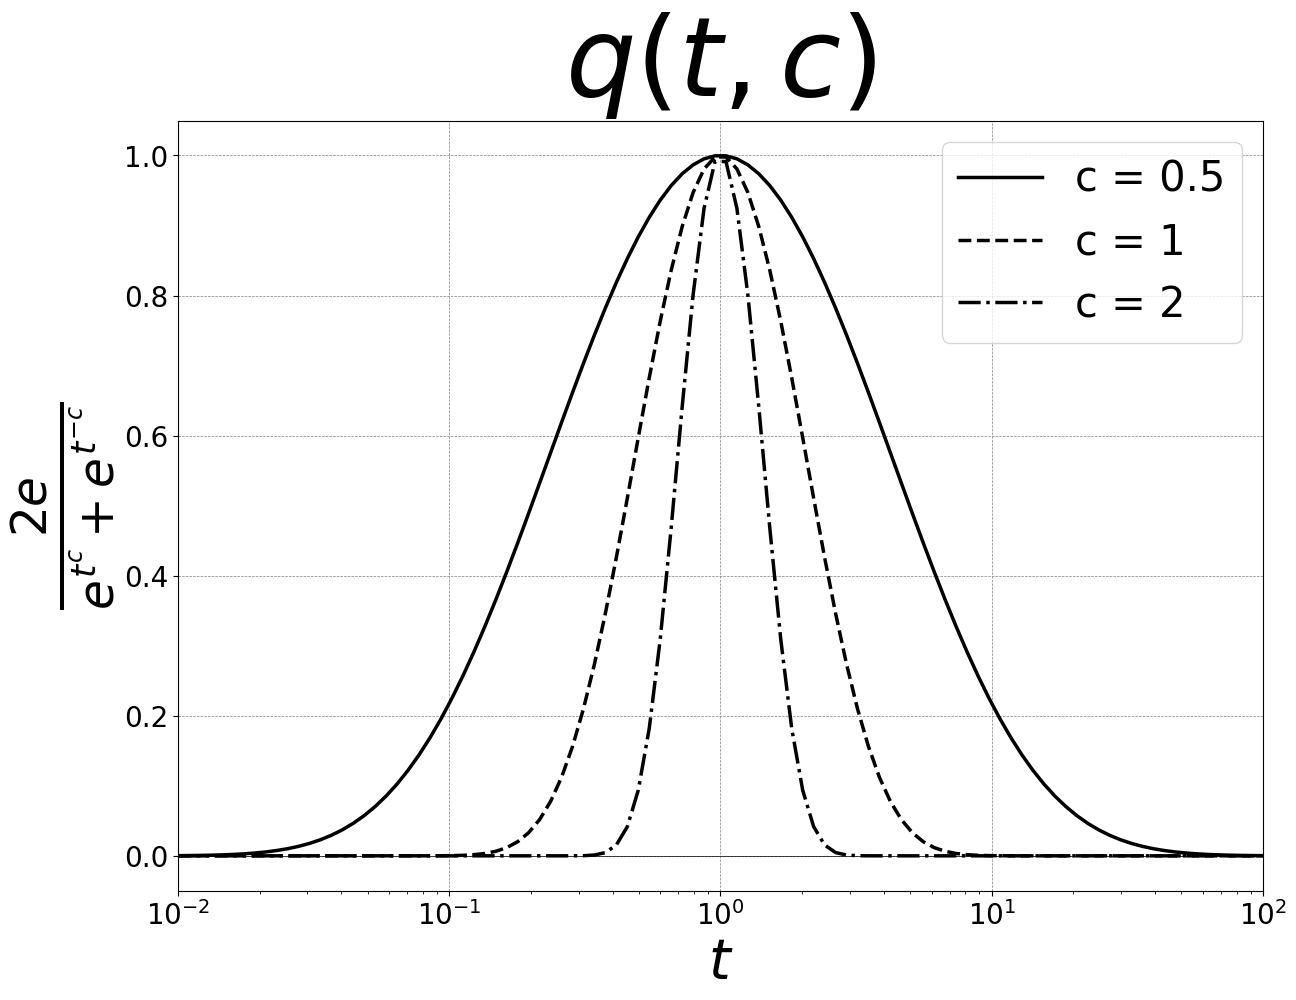

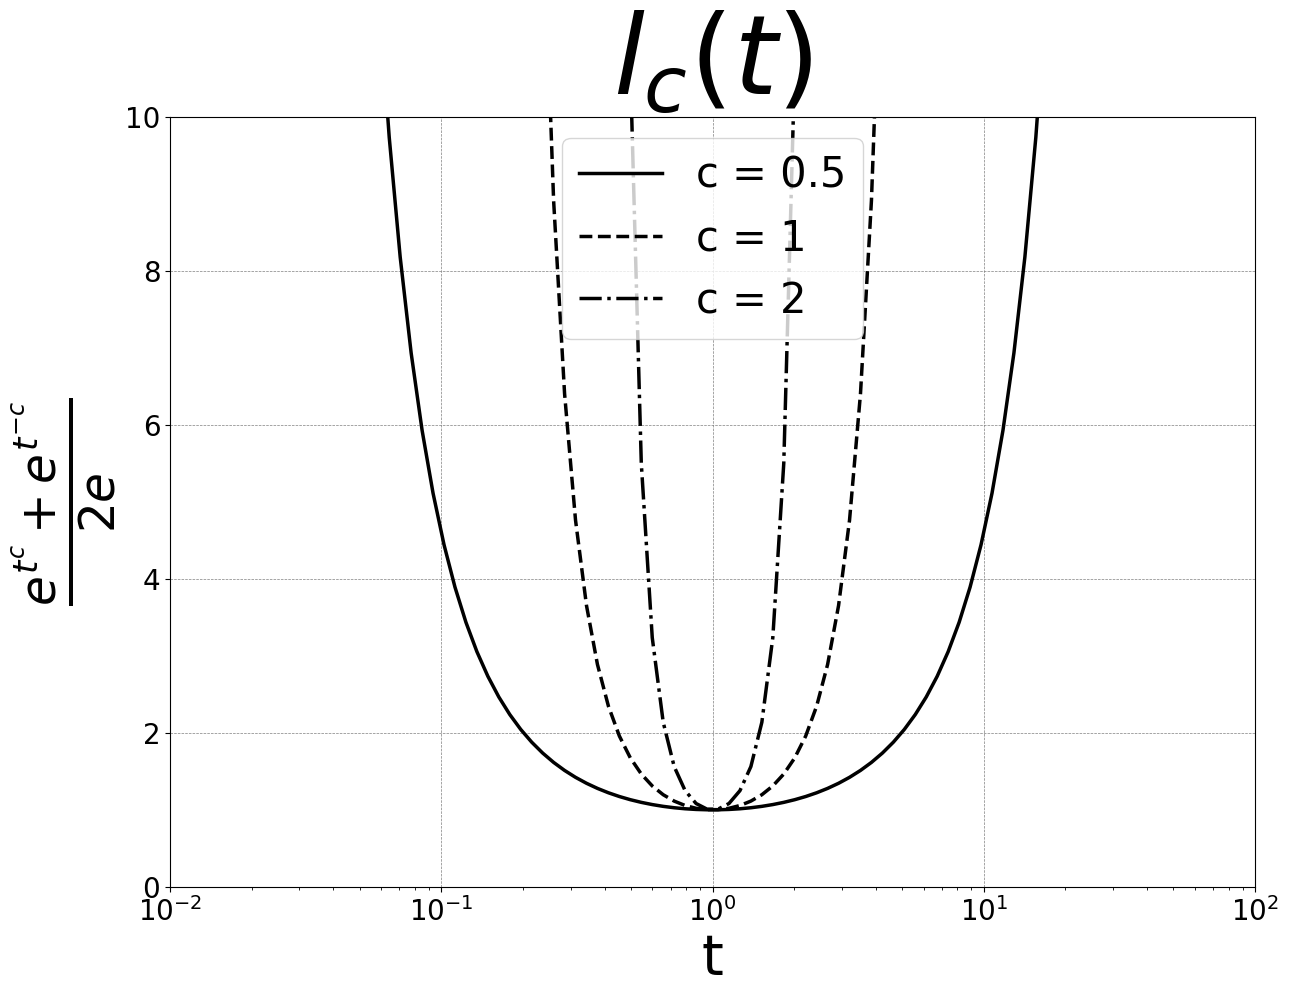

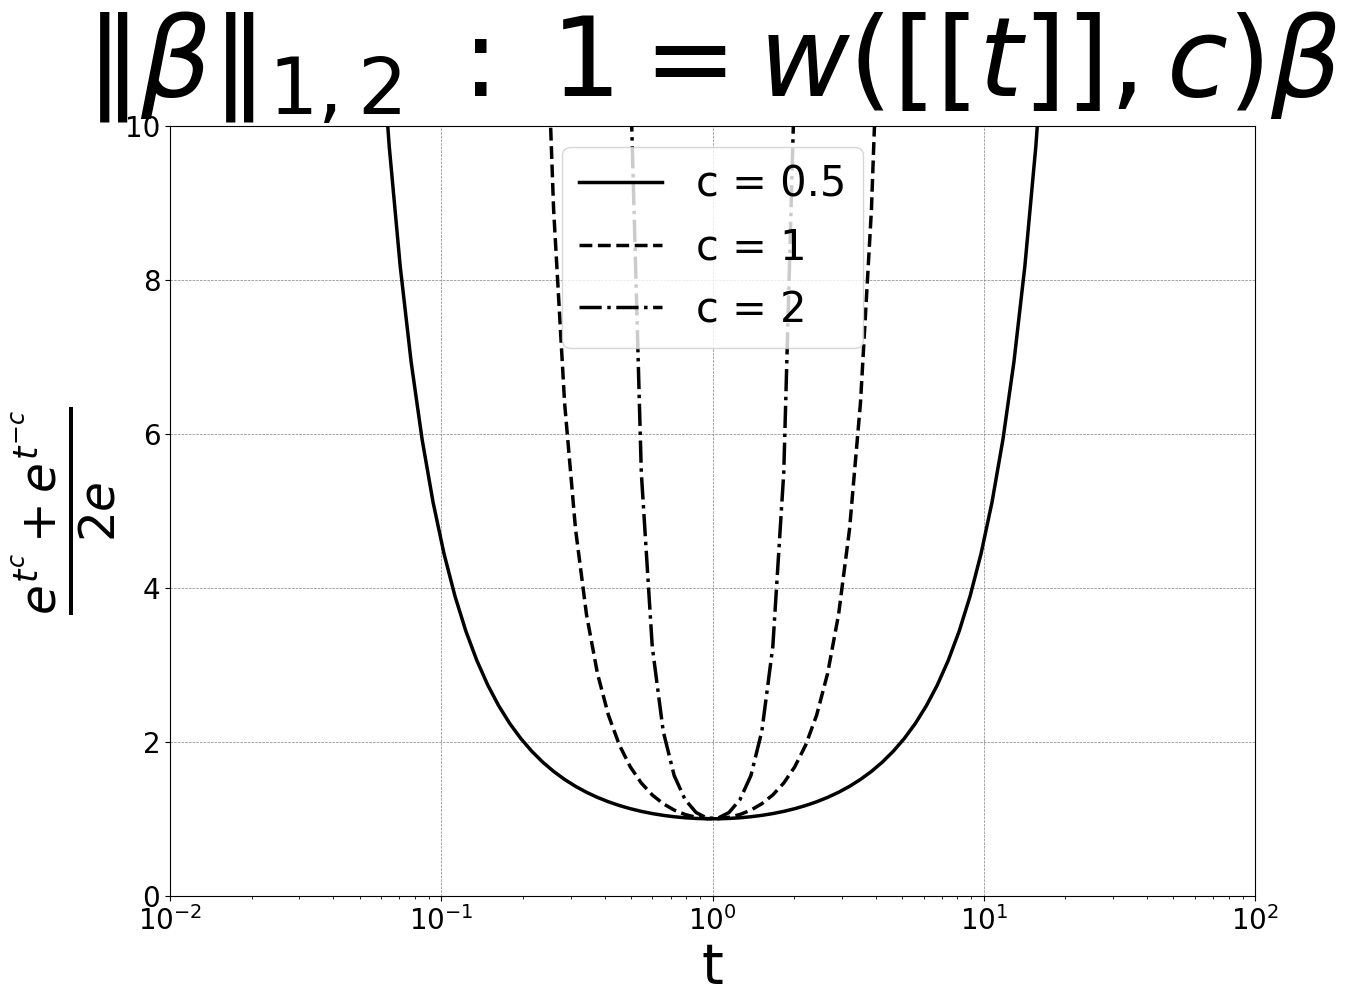

In [6]:
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt

from isometry_pursuit.transformation import exponential_transformation
from isometry_pursuit.loss import isometry_loss

# Matrix values and rearrangement
matrix_values = np.logspace(-2, 2, 100)
rearranged_matrix_values = rearrange(matrix_values, 'n -> n 1 1')

# Powers and initializations
powers = [0.5, 1, 2]
length_values = []
loss_values_isometry = []
basis_pursuit_losses = []

# Compute transformations and losses
for power in powers:
    lengths = [exponential_transformation(rmv, power)[0][0] for rmv in rearranged_matrix_values]
    length_values.append(lengths)
    loss_values_isometry.append([isometry_loss(rmv, power) for rmv in rearranged_matrix_values])
    basis_pursuit_losses.append(np.asarray(lengths) ** (-1))

# Plot the function - Length
fig, ax = plt.subplots(1, 1, figsize=(14,10))
line_styles = ['-', '--', '-.']  # Different line styles for visibility
for i, power in enumerate(powers):
    ax.plot(matrix_values, length_values[i], label=f'c = {power}', color='black', linewidth = 2.5, linestyle=line_styles[i])

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title(r'$q(t,c)$', fontsize=80)
ax.set_ylabel(r'$\frac{2e}{e^{t^c} + e^{t^{-c}}}$', fontsize=50)  # log concave
ax.set_xlabel(r'$t$', fontsize=40)
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e2)
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
fig.show()
fig.savefig('../figures/Figure_1b_bw')

# Plot the function - Loss
fig, ax = plt.subplots(1, 1, figsize=(14,10))
for i, power in enumerate(powers):
    ax.plot(matrix_values, basis_pursuit_losses[i], label=f'c = {power}', color='black', linewidth = 2.5, linestyle=line_styles[i])

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title(r"$l_c(t)$", fontsize=80)
ax.set_ylim(0, 10)
ax.set_ylabel(r'$\frac{e^{t^c} + e^{t^{-c}}}{2e}$', fontsize=50)  # log concave
ax.set_xlabel('t', fontsize=40)
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e2)
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
fig.show()
fig.savefig('../figures/Figure_1a_bw')


# Plot the function - Loss
fig, ax = plt.subplots(1, 1, figsize=(14,10))
for i, power in enumerate(powers):
    ax.plot(matrix_values, basis_pursuit_losses[i], label=f'c = {power}', color='black', linewidth = 2.5, linestyle=line_styles[i])

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title(r"$\|\beta\|_{1,2} \; : \; 1 = w([[t]], c) \beta$", fontsize=80)
ax.set_ylim(0, 10)
ax.set_ylabel(r'$\frac{e^{t^c} + e^{t^{-c}}}{2e}$', fontsize=50)  # log concave
ax.set_xlabel('t', fontsize=40)
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e2)
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
fig.show()
fig.savefig('../figures/Figure_1c_bw')